## Downloading the data

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd

# Taken from https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/

In [11]:
startDate = '2001-10-11'
endDate = '2022-04-15'
axes = ['Date', 'Value']
etf_list = ['XLF', 'XLU', 'QQQ', 'SPY', 'XLP', 'EWZ', 'EWH', 'XLY', 'XLE']

df = pd.DataFrame()
for etf in etf_list:
    data = yf.download(etf, start=startDate, end=endDate)
    df = pd.concat([df, pd.DataFrame({etf: data['Close']})], axis = 1)
# df = df.reset_index()
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  XLF        XLU        QQQ         SPY        XLP   EWZ  \
Date                                                                       
2001-10-10  19.894396  30.100000  32.500000  108.320000  25.549999  8.88   
2001-10-11  20.211210  29.660000  34.700001  110.000000  25.370001  9.21   
2001-10-12  19.894396  29.459999  34.549999  109.500000  25.350000  9.21   

## Calculating Portfolio Returns

In [12]:
returns_portfolio = df.pct_change()
returns_portfolio.head()

,XLF,XLU,QQQ,SPY,XLP,EWZ,EWH,XLY,XLE
Date,,,,,,,,,
2001-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-10-11,0.015925,-0.014618,0.067692,0.015510,-0.007045,0.037162,0.006061,0.032101,-0.000351
2001-10-12,-0.015675,-0.006743,-0.004323,-0.004545,-0.000788,0.000000,-0.037349,-0.021654,-0.006667
2001-10-15,0.004492,-0.001697,-0.004341,-0.001826,0.004339,0.017372,0.006258,-0.002817,-0.018368
2001-10-16,0.016260,0.007480,0.016279,0.006313,-0.005499,0.019210,-0.004975,0.010089,0.011875


In [13]:
weight_portfolio = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
portfolio_return = returns_portfolio.dot(weight_portfolio)
portfolio_return.head()

Date
2001-10-10         NaN
2001-10-11    0.016937
2001-10-12   -0.010861
2001-10-15    0.000379
2001-10-16    0.008559
dtype: float64

## Calculating Portfolio Risk

In [14]:
variance_matrix = returns_portfolio.cov()*252
variance_matrix

,XLF,XLU,QQQ,SPY,XLP,EWZ,EWH,XLY,XLE
XLF,0.088871,0.029995,0.047029,0.049000,0.026889,0.066339,0.046594,0.050148,0.055829
XLU,0.029995,0.037537,0.023500,0.025037,0.018432,0.035178,0.022464,0.022530,0.030391
QQQ,0.047029,0.023500,0.053401,0.039802,0.021016,0.052068,0.037128,0.041444,0.038472
SPY,0.049000,0.025037,0.039802,0.037291,0.021453,0.050024,0.034482,0.037221,0.042292
XLP,0.026889,0.018432,0.021016,0.021453,0.020693,0.027662,0.018901,0.021368,0.022065
EWZ,0.066339,0.035178,0.052068,0.050024,0.027662,0.152112,0.058957,0.048299,0.072733
EWH,0.046594,0.022464,0.037128,0.034482,0.018901,0.058957,0.061192,0.034784,0.042509
XLY,0.050148,0.022530,0.041444,0.037221,0.021368,0.048299,0.034784,0.046314,0.038468
XLE,0.055829,0.030391,0.038472,0.042292,0.022065,0.072733,0.042509,0.038468,0.087863


In [16]:
# Computing the portfolio variance
portfolio_variance = np.transpose(weight_portfolio)@variance_matrix@weight_portfolio

# Computing the portfolio volatility
portfolio_volatility = np.sqrt(portfolio_variance)

print(f"Portfolio Variance: {portfolio_variance}")
print(f"Portfolio Volatility: {portfolio_volatility}")

Portfolio Variance: 0.040571428325964755
Portfolio Volatility: 0.20142350489941524


## Modern Portfolio Theory

In [21]:
port_returns = []
port_volatilities = []
port_weights = []

n_assets = len(etf_list)
n_portfolios = 10000

individual_returns = df.resample('Y').last().pct_change().mean()

In [22]:
for port in range(n_portfolios):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)
    port_weights.append(weights)
    returns = np.dot(weights, individual_returns)
    port_returns.append(returns)

    var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(252)
    port_volatilities.append(ann_sd)

In [23]:
d = {'Returns': port_returns, 'Volatility': port_volatilities}

for counter, symbol in enumerate(etf_list):
    d[f"{symbol} weight"] = [w[counter] for w in port_weights]

In [24]:
portfolios_V1 = pd.DataFrame(d)
portfolios_V1.head()

,Returns,Volatility,XLF weight,XLU weight,QQQ weight,SPY weight,XLP weight,EWZ weight,EWH weight,XLY weight,XLE weight
0,0.097836,3.310847,0.099033,0.068501,0.175652,0.131123,0.093786,0.162588,0.141415,0.099240,0.028665
1,0.099816,3.533911,0.014709,0.164959,0.048541,0.186433,0.032930,0.278872,0.098019,0.086314,0.089222
2,0.094918,3.233298,0.041607,0.151504,0.146543,0.173042,0.047285,0.100988,0.037584,0.105057,0.196391
3,0.084814,3.067085,0.051970,0.112039,0.062164,0.154096,0.160803,0.085732,0.153347,0.067429,0.152420
4,0.088835,3.022490,0.006256,0.009144,0.064384,0.242597,0.175307,0.072380,0.194901,0.155035,0.079994


Text(0, 0.5, 'Expected Returns')

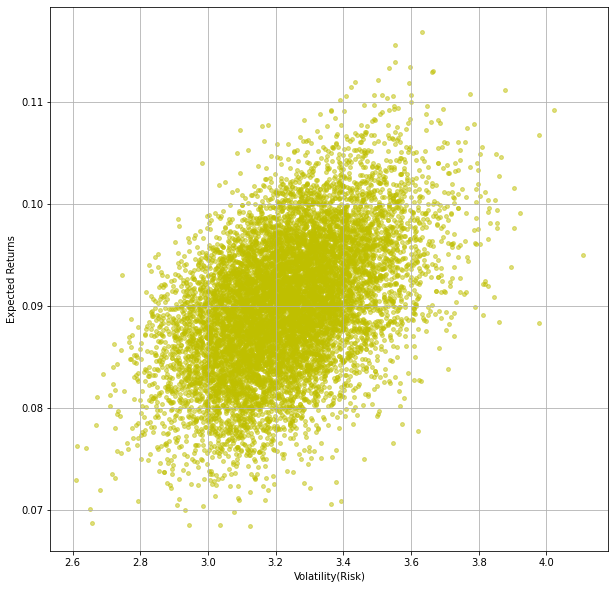

In [28]:
portfolios_V1.plot.scatter(x='Volatility', y='Returns', marker='o', color='y', s=15, alpha=0.5, grid=True, figsize=(10,10))
plt.xlabel('Volatility(Risk)')
plt.ylabel('Expected Returns')